In [395]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## 1. Загрузить датасет с помощью библиотеки pandas.

In [397]:
df = pd.read_csv('credit_risk2.csv')

## 2. Провести предварительную обработку данных.

In [399]:
df.head(3)

Id   Age  Income      Home  Emp_length     Intent  Amount   Rate  Status  \
0   0  22.0   59000      RENT       123.0   PERSONAL   35000  16.02       1   
1   1  21.0    9600       OWN         5.0  EDUCATION    1000  11.14       0   
2   2  25.0    9600  MORTGAGE         1.0    MEDICAL    5500  12.87       1   

   Percent_income Default  Cred_length  
0            0.59       Y            3  
1            0.10       N            2  
2            0.57       N            3

Данные содержат информацию о кредитных заявках:
- возраст (Age)
- доход (Income)
- статус домовладения (Собственный, Ипотека, Аренда) (Home)
- стаж работы в годах (Emp_lenght)
- цель кредита (Intent)
- сумма кредита по заявке (Amount)
- процентная ставка (Rate)
- статус одобрения кредита (Status)
- сумма кредита в процентах от дохода (Percent_income)
- не допустил ли заявитель ранее дефолта по кредиту (да, нет) (Default)
- длина кредитной истории заявителя (Cred_lenght)

Для просмотра информации о датасете, будут применены методы info() и describe()

In [402]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 652 entries, 0 to 651
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Id              652 non-null    int64  
 1   Age             652 non-null    float64
 2   Income          652 non-null    int64  
 3   Home            652 non-null    object 
 4   Emp_length      643 non-null    float64
 5   Intent          652 non-null    object 
 6   Amount          652 non-null    int64  
 7   Rate            586 non-null    float64
 8   Status          652 non-null    int64  
 9   Percent_income  652 non-null    float64
 10  Default         652 non-null    object 
 11  Cred_length     652 non-null    int64  
dtypes: float64(4), int64(5), object(3)
memory usage: 61.3+ KB


In [403]:
df.describe()

Id         Age         Income  Emp_length        Amount  \
count  652.000000  652.000000     652.000000  643.000000    652.000000   
mean   325.495399   24.285276   90008.855828    4.601866  18800.996933   
std    188.352535    7.841061   69530.312525    7.281616   9152.896250   
min      0.000000   21.000000    9600.000000    0.000000   1000.000000   
25%    162.750000   23.000000   44000.000000    2.000000  10000.000000   
50%    325.500000   24.000000   69998.000000    4.000000  21850.000000   
75%    488.250000   25.000000  128499.000000    7.000000  25000.000000   
max    649.000000  144.000000  500000.000000  123.000000  35000.000000   

             Rate      Status  Percent_income  Cred_length  
count  586.000000  652.000000      652.000000   652.000000  
mean    12.289471    0.601227        0.279831     3.012270  
std      3.272772    0.490022        0.150231     0.808843  
min      5.420000    0.000000        0.010000     2.000000  
25%     10.250000    0.000000        0.160000     2.000000  
50%     12.180000    1.000000        0.280000     3.000000  
75%     14.720000    1.000000        0.380000     4.000000  
max     21.210000    1.000000        0.830000     4.000000

Сначала будут предобработаны числовые признаки. Первый числовой признак - «Age». Из метода info видно, что тип данных отличается от остальных, поэтому было принято решение преобразовать тип данных к int64.

In [405]:
df.Age = df.Age.astype('int64')

По методу describe заметны выбросы в признаке «Age», поэтому была произведена сортировка с целью посмотреть на аномальные данные.

In [407]:
df.Age.sort_values()

325     21
30      21
567     21
107     21
35      21
      ... 
34      26
392     26
575    123
183    144
81     144
Name: Age, Length: 652, dtype: int64

Возраст человека не может быть больше 100, выбросы были удалены.

In [409]:
df = df[df['Age'] < 100]

Аналогично, в признаке «Emp_length» были замечены выбросы.

In [411]:
df.Emp_length.dropna().sort_values()

62       0.0
229      0.0
70       0.0
571      0.0
620      0.0
       ...  
577     10.0
553     11.0
141     11.0
210    123.0
0      123.0
Name: Emp_length, Length: 640, dtype: float64

Стаж работы не может быть больше 100 лет, выбросы были удалены.

In [413]:
df['Emp_length'] = df[df['Emp_length'] < 100]['Emp_length']

Также в признаке «Emp_length» есть пропуски (9 штук). В сравнении с размером датасета, количество пропусков незначительно, можно от них избавиться. 

In [415]:
df.dropna(subset='Emp_length', inplace = True)

В признаке «Rate» замечены пропуски. Для того, чтобы принять решение о том, что делать с ними, необходимо изучить характеристики данного столбца.

In [417]:
display(df.Rate.describe(), df.Rate.mode())

count    573.000000
mean      12.329459
std        3.258778
min        5.790000
25%       10.250000
50%       12.180000
75%       14.740000
max       21.210000
Name: Rate, dtype: float64

0    10.99
Name: Rate, dtype: float64

Медиана примерно равна среднему, а также близка к моде. Можно заменить пропуски на медианное значение, так как она примерно соответствует всем характеристикам числового столбца.

In [419]:
df.Rate = df.Rate.fillna(df.Rate.median())

Числовые признаки обработаны, далее будут обработаны категориальные признаки. Первой колонкой будет признак «Home».

In [421]:
df.Home.value_counts()

Home
RENT        411
MORTGAGE    128
OWN          96
OTHER         2
RENET         1
Name: count, dtype: int64

Замечены неявные дубликаты в виде названий с ошибками. Они будут заменены на правильные названия.

In [423]:
df.Home = df.Home.replace({'RENET' : 'RENT'})

Далее, будет обработан признак «Intent».

In [425]:
df.Intent.value_counts()

Intent
EDUCATION            140
VENTURE              114
PERSONAL             108
MEDICAL              107
DEBTCONSOLIDATION    102
HOMEIMPROVEMENT       67
Name: count, dtype: int64

В признаке «Intent» со значениями все нормально, остался последний признак - «Default».

In [427]:
df.Default.value_counts()

Default
N     487
Y     148
No      3
Name: count, dtype: int64

Замечены неявные дубликаты, они будут заменены на корректные значения.

In [429]:
df.Default = df.Default.replace({'No': 'N'})

Числовые и категориальные признаки обработаны, теперь необходимо проверить датасет на наличие явных дубликатов.

In [431]:
df[df.duplicated()]

Id  Age  Income  Home  Emp_length             Intent  Amount  Rate  \
650  649   23   58800  RENT         7.0  DEBTCONSOLIDATION   20000  7.66   
651  649   23   58800  RENT         7.0  DEBTCONSOLIDATION   20000  7.66   

     Status  Percent_income Default  Cred_length  
650       1            0.34       N            3  
651       1            0.34       N            3

В результате применения метода duplicated, были найдены два явных дубликата, от которых необходимо избавиться.

In [433]:
df.drop_duplicates(inplace=True)
df[df.duplicated()]

Empty DataFrame
Columns: [Id, Age, Income, Home, Emp_length, Intent, Amount, Rate, Status, Percent_income, Default, Cred_length]
Index: []

Данные предобработаны, можно переходить к выполнению заданий.

## 3. Построить точечную диаграмму (матрицу диаграмм рассеяния). Выполнить анализ полученной диаграммы, отвечая на вопрос показывает ли она в среднем определенную зависимость между переменными. Изучить параметры и описать взаимосвязи. Если параметров слишком много – может потребоваться создать несколько графиков.

Для того чтобы обнаружить взаимосвязи между данными могут применяться диаграммы рассеяния – особый тип графика, который также называется scatter . На таком графике можно увидеть связь между двумя величинами или её отсутствие, а также аномальные точки.

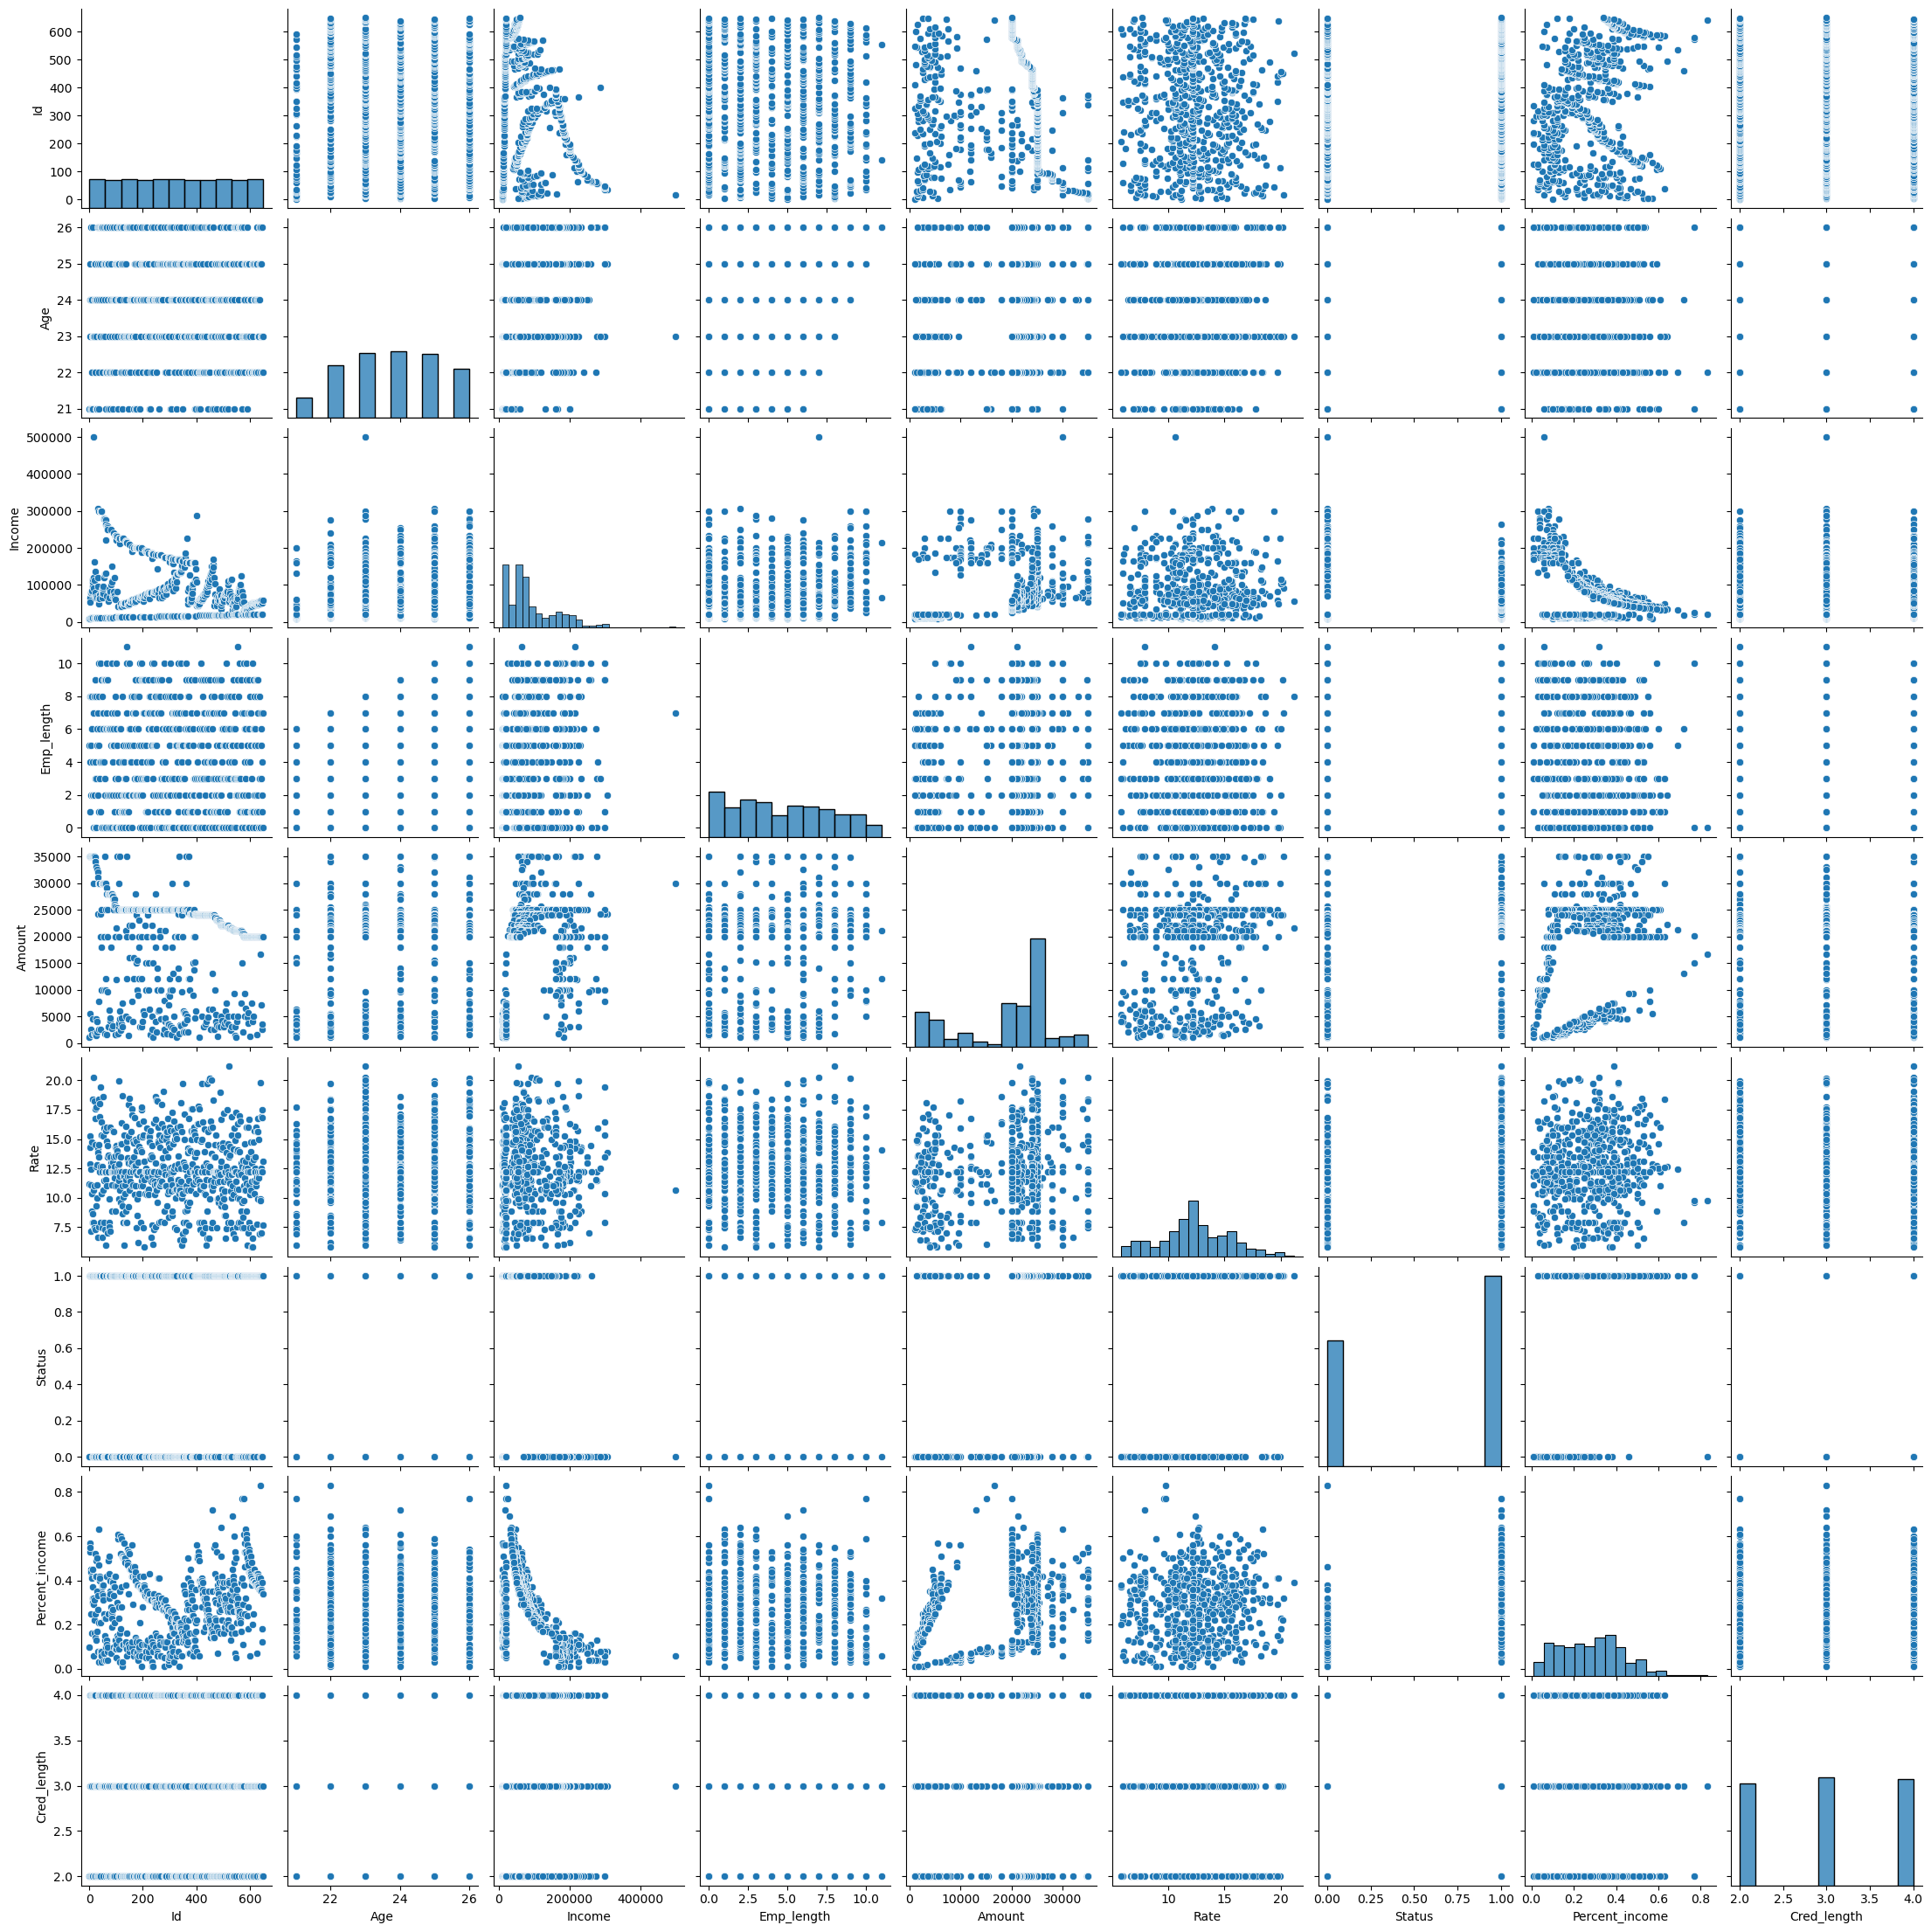

In [437]:
sns.pairplot(df.select_dtypes(exclude = 'object'))
plt.show()

Была построена матрица диаграмм рассеяния со всеми числовыми параметрами, по которой видно, что некоторые признаки являются дискретными, поэтому матрицу можно упростить.

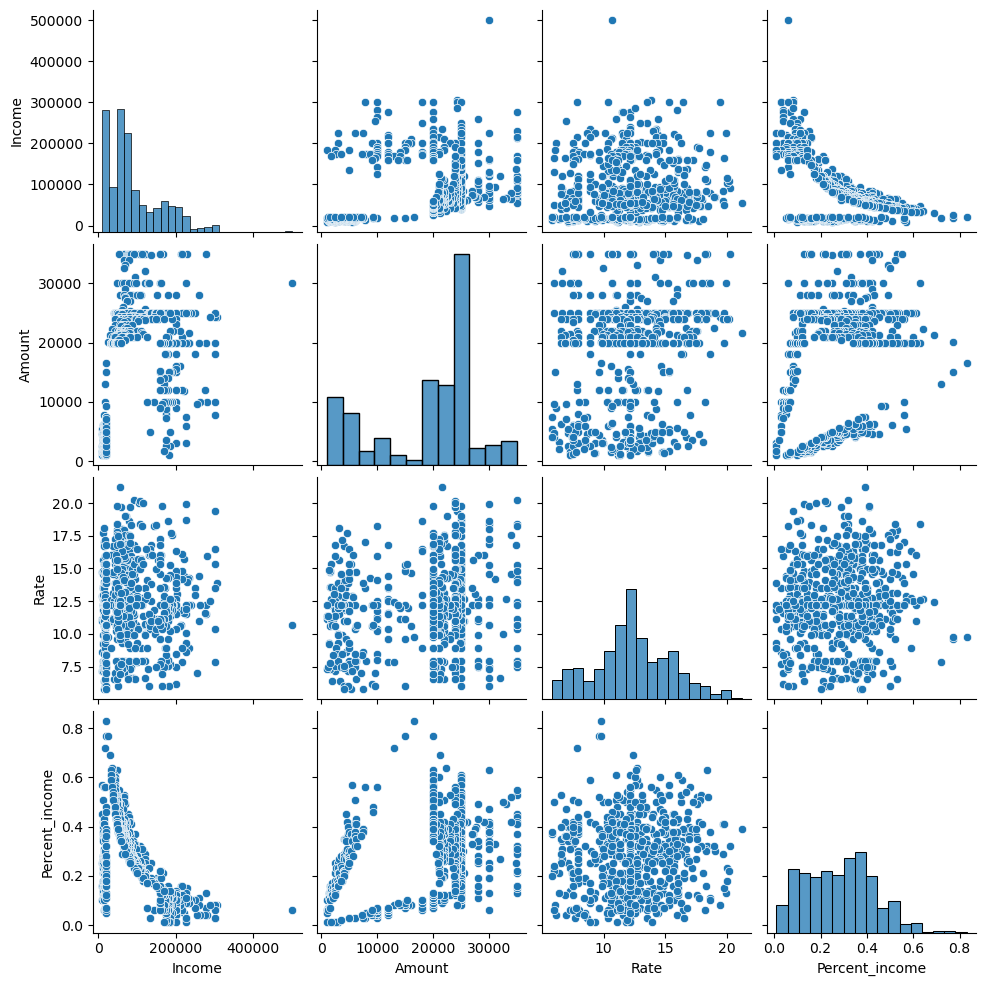

In [439]:
sns.pairplot(df.select_dtypes(exclude = 'object').drop(columns = ['Id','Age', 'Emp_length', 'Status', 'Cred_length']))
plt.show()

В результате построения диаграмм рассеяния, можно сделать следующие предположения о взаимосвязи между величинами:
- На диаграмме Income - Percent_income наблюдается зависимость, возможно, отрицательная криволинейная;
- На диаграмме Amount - Percent_income наблюдается линейная закономерность (две линии) до значений, равных 20000;
- Распределение значения признака «Rate» напоминает нормальное.

Между остальными числовыми признаками, взаимосвязи не замечено.

## 4. Исследовать взаимосвязь между переменными с помощью оценки коэффициента корреляции и ковариации. Выполнить интерпретацию результатов корреляции и ковариации, отвечая на вопросы о наличии (отсутствии) линейной взаимосвязи между переменными.

In [442]:
corr_matrix = df.select_dtypes(exclude='object').corr()
corr_matrix.drop(columns='Id', index='Id', inplace=True)
corr_matrix

Age    Income  Emp_length    Amount      Rate    Status  \
Age             1.000000  0.311280    0.180417  0.182071  0.024252 -0.168104   
Income          0.311280  1.000000    0.172775  0.289995  0.043607 -0.586554   
Emp_length      0.180417  0.172775    1.000000  0.166353 -0.036292 -0.057312   
Amount          0.182071  0.289995    0.166353  1.000000  0.185898  0.081408   
Rate            0.024252  0.043607   -0.036292  0.185898  1.000000  0.187898   
Status         -0.168104 -0.586554   -0.057312  0.081408  0.187898  1.000000   
Percent_income -0.160407 -0.627381   -0.060646  0.334954  0.060408  0.672570   
Cred_length     0.002493  0.004333   -0.088483 -0.017462 -0.045194 -0.041247   

                Percent_income  Cred_length  
Age                  -0.160407     0.002493  
Income               -0.627381     0.004333  
Emp_length           -0.060646    -0.088483  
Amount                0.334954    -0.017462  
Rate                  0.060408    -0.045194  
Status                0.672570    -0.041247  
Percent_income        1.000000    -0.031989  
Cred_length          -0.031989     1.000000

Корреляция может принимать значения от -1 до 1, чем ближе корреляция к крайним значениям, тем линейная взаимосвязь сильнее выражена. Если значение корреляции отрицательно, значит при увеличении значения одной величины, значение другой уменьшается. Если положительно, значит при увеличении значения одного признака, увеличивается и значение другого. Если значение корреляции близко к 0, значит взаимосвязь отсутствует.
Интерпретация полученного результата матрицы корреляций:
- С признаком ID отрицательное коррелирует показатель дохода, связь слабая;
- Наблюдается положительная слабая корреляция признака Age с Income;
- Наблюдается заметная отрицательная корреляция признака Income с Status и Percent_income;
- Наблюдается слабая положительная связь между признаками Amount c Income и Percent_income.

У остальных признаков взаимосвязь отсутствует.

Далее, будет построена матрица ковариаций.

In [445]:
cov_matrix = df.select_dtypes(exclude='object').cov()
cov_matrix.drop(columns='Id', index='Id', inplace=True)
cov_matrix

Age        Income    Emp_length        Amount  \
Age                 2.208416  3.205191e+04      0.816974  2.449878e+03   
Income          32051.907867  4.800924e+09  36478.068279  1.819348e+08   
Emp_length          0.816974  3.647807e+04      9.284948  4.589679e+03   
Amount           2449.877804  1.819348e+08   4589.679221  8.198348e+07   
Rate                0.111082  9.312634e+03     -0.340844  5.187902e+03   
Status             -0.122367 -1.990740e+04     -0.085542  3.610577e+02   
Percent_income     -0.035783 -6.525434e+03     -0.027740  4.552645e+02   
Cred_length         0.003008  2.438440e+02     -0.218979 -1.284144e+02   

                       Rate        Status  Percent_income  Cred_length  
Age                0.111082     -0.122367       -0.035783     0.003008  
Income          9312.633988 -19907.395214    -6525.434130   243.844042  
Emp_length        -0.340844     -0.085542       -0.027740    -0.218979  
Amount          5187.901501    361.057668      455.264505  -128.414426  
Rate               9.499647      0.283675        0.027949    -0.113134  
Status             0.283675      0.239932        0.049454    -0.016409  
Percent_income     0.027949      0.049454        0.022534    -0.003900  
Cred_length       -0.113134     -0.016409       -0.003900     0.659642

Ковариация характеризует степень зависимости двух переменных. Чем она больше отличается от нуля, тем больше зависимость. Если большие значения одной переменной в основном соответствуют большим значениям другой переменной, и то же самое верно для меньших значений (то есть переменные имеют тенденцию одинаковой направленности) — ковариация положительна. При отрицательной ковариации большие значения одной переменной в основном соответствуют меньшим значениям другой и наоборот (то есть переменные имеют тенденцию противоположной направленности).
Интерпретация полученных результатов:
- Коэффициенты ковариации, сильно отличные от нуля, наблюдаются у тех же сочетаний признаков, что и в матрице корреляций, значит признаки действительно зависимы друг от друга.

## 5. Построить heatmap (тепловую карту корреляции).

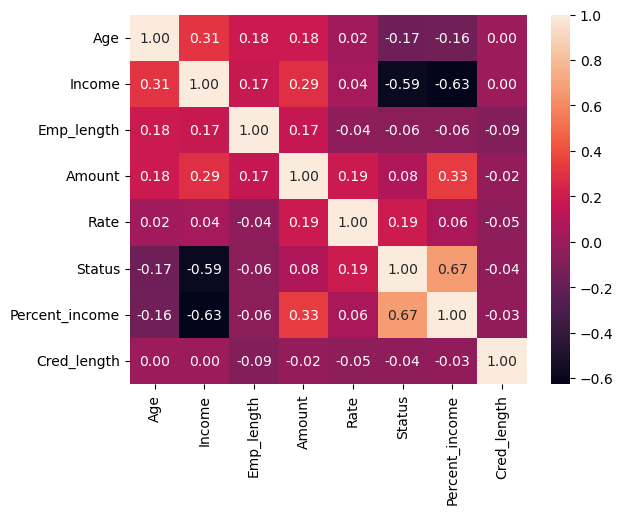

In [448]:
sns.heatmap(corr_matrix, annot=True, fmt='.2f')
plt.show()

Полученная тепловая карта матрицы корреляций хорошо отображает полученные значения. Чем цвет ближе к черному, или белому, тем сильнее зависимость между переменными. В параметрах тепловой карты указано наличие аннотаций и форматирование значений до 2 знаков после запятой.

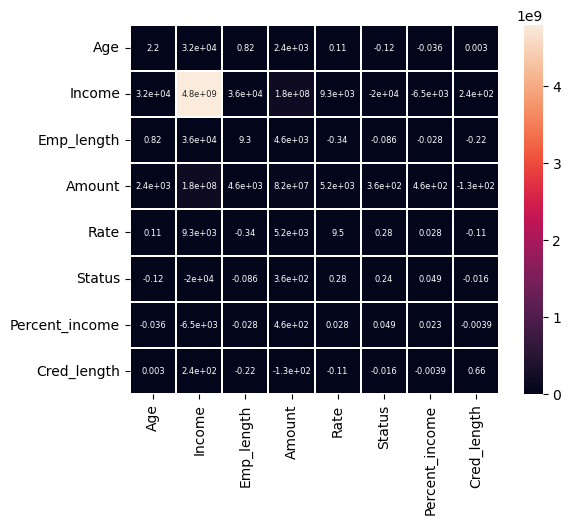

In [450]:
sns.heatmap(cov_matrix, annot=True, annot_kws={'size':6}, square=True, linewidth=0.1)
plt.show()

Так как значения коэффициентов ковариаций сильно различаются по масштабам, то полученная матрица плохо отображает полученные результаты. 
Касательно параметров тепловой карты, здесь указано наличие аннотаций (самих значений коэффициентов), размер этих аннотаций, и разделение ячеек на квадраты.

## 6. Постройте графики по заданию в варианте.

### Задание 1. Использовать seaborn. По группировке - цель кредита (intent) по количеству статуса домовладения (home) построить диаграмму.

In [454]:
task1 = pd.DataFrame(df.groupby('Intent')['Home'].value_counts())

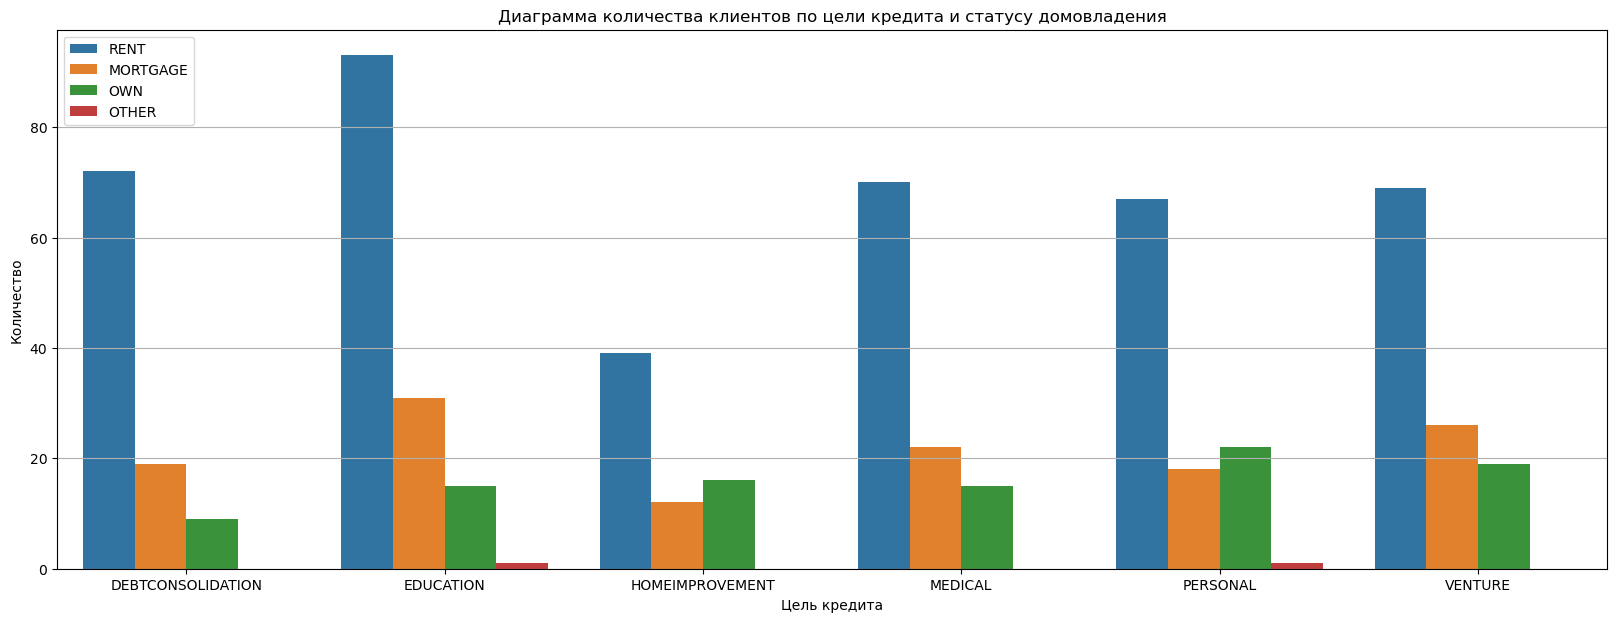

In [455]:
f, ax = plt.subplots(figsize= (20,7))
sns.barplot(task1, x = 'Intent', y = 'count', hue = 'Home', ax=ax)
plt.grid(axis = 'y')
plt.xlabel('Цель кредита')
plt.ylabel('Количество')
plt.legend(loc = 'upper left')
ax.set_title('Диаграмма количества клиентов по цели кредита и статусу домовладения')
plt.show()

В результате построения диаграммы, можно увидеть, что у всех целей кредитов преобладает тип домовладения - собственность в аренде.

### Задание 2. Использовать pandas и plot. Отфильтровать возраст - до 100 По сводной таблице (pivot_table) - отобразить средний доход (income) по возрасту. Оставить только маркеры в виде ★ коричневого цвета размером 16.

In [458]:
df['Age'] = df[df['Age'] < 100]['Age']

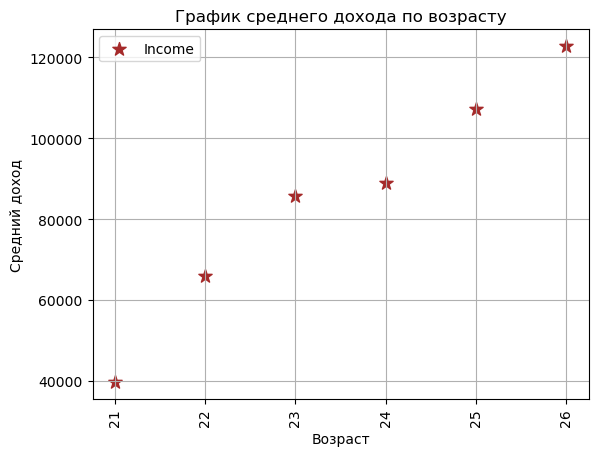

In [459]:
task2 = df.pivot_table(index = 'Age', values = 'Income', aggfunc='mean').reset_index()
ax = task2.plot(x = 'Age', 
           y = 'Income', 
           kind = 'scatter', 
           marker = '*', 
           c = 'Brown', 
           s = 100,
           grid = True,
           xlabel = 'Возраст',
           ylabel = 'Средний доход',
           title = 'График среднего дохода по возрасту',
           rot = 90)
plt.legend(['Income'])
plt.show()

В результате построения графика, можно увидеть то, как средний доход зависит от возраста заявителя.

### Задание 3. Использовать matplotlib. Построить круговую диаграмму, которая отображает процент по каждой цели кредита (intent).

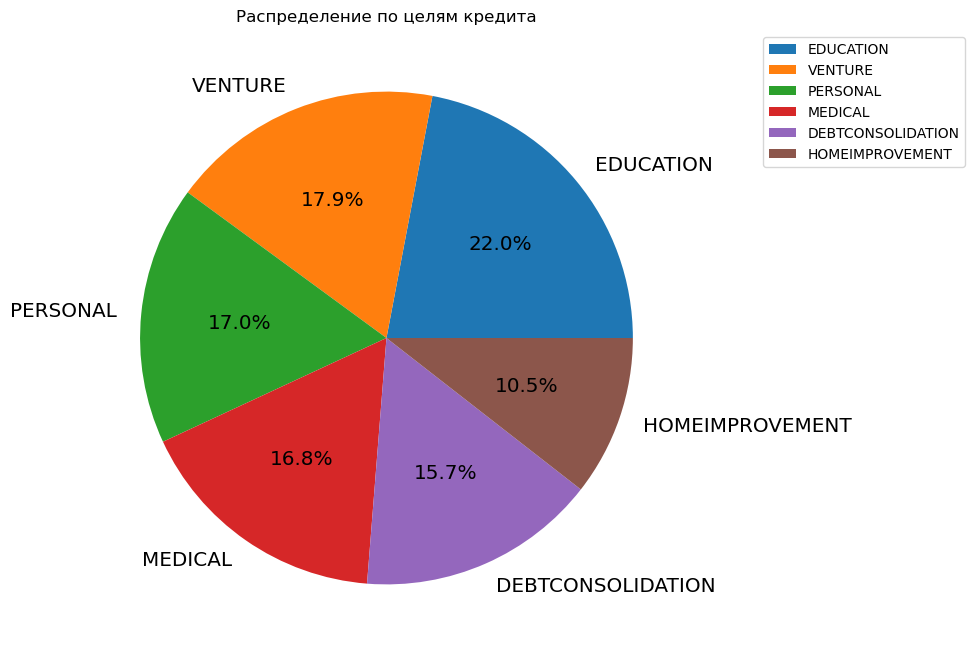

In [462]:
task3 = df.Intent.value_counts()
f, ax = plt.subplots(figsize = (26,8))
plt.pie(task3, autopct='%1.1f%%', labels=task3.index, textprops={'size':'x-large'})
plt.legend(bbox_to_anchor = (1.1,1))
ax.set_title('Распределение по целям кредита')
plt.show()

Была построена круговая диаграмма, из которой видно, что чаще всего целей кредита является образование.

## Вывод
В результате выполнения лабораторной работы была проведена предобработка данных, а также, изучен функционал таких библиотек по визуализации данных, как matplotlib (pyplot), seaborn и встроенные возможности библиотеки pandas. Были изучены такие виды диаграмм, как: диаграмма рассеяния, столбчатая диаграмма, круговая диаграмма. Также были изучены такие понятия, как корреляция и ковариация, построены матрицы корреляций и ковариаций, и, по ним, тепловые карты.

## Дополнительное задание

1. Boxplot по цели кредита

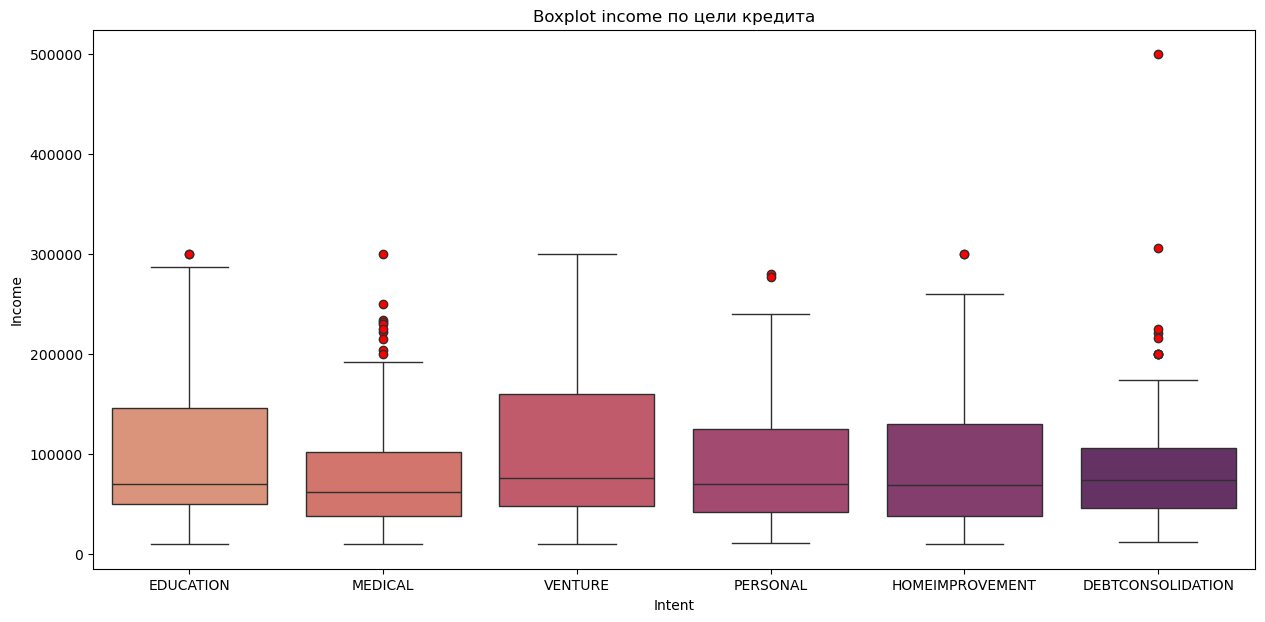

In [467]:
f, ax = plt.subplots(figsize= (15,7))
sns.boxplot(x = df.Intent, y = df.Income, ax=ax, palette='flare', hue = df.Intent, flierprops={"markerfacecolor": "r", 'markersize':6})
plt.title('Boxplot income по цели кредита')
plt.show()

Интерпретация полученного графика: 
График boxplot (ящик с усами) показывает квартили значений признака, межквартильный размах, а также выбросы (значения, которые больше или меньше значения = +-1.5 межквартильного размаха).
В данном случае, отображено распределение величины Income, в зависимости от Intent. Можно заметить, что в Intent = Medical, есть много значений, которые больше 1.5 межквартильного размаха. У цели DEBTCONSOLIDATION наблюдается выброс в 500000 единиц Income. Медианы Income (2 квартиль) всех целей находятся примерно на одном уровне в 80000 единиц.

2. Boxplot amount по цели кредита

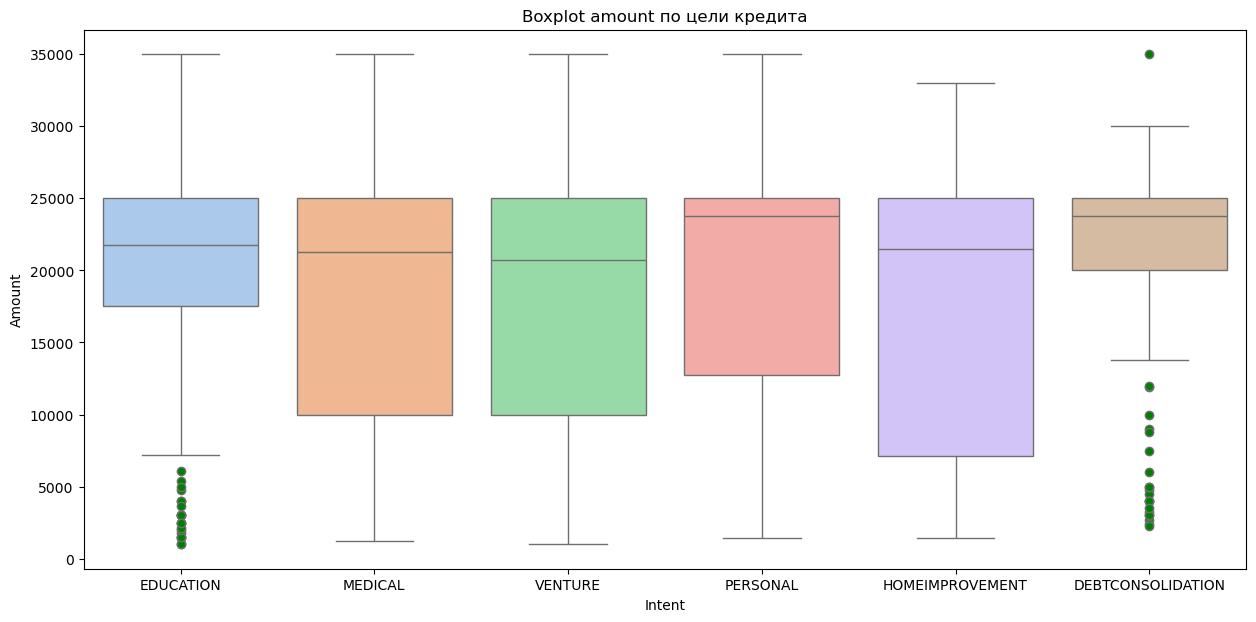

In [470]:
f, ax = plt.subplots(figsize= (15,7))
sns.boxplot(x = df.Intent, y = df.Amount, ax = ax, palette='pastel', hue = df.Intent, flierprops={"markerfacecolor": "g", 'markersize':6})
plt.title('Boxplot amount по цели кредита')
plt.show()

Аналогично был построен ящик с усами для Amount по целям. В целях EDUCATION и DEBTCONSOLIDATION, наблюдаются значения, ниже 1.5 межквартильного размаха, по сути - выбросы. Медианы Amount по целям, также располагаются примерно на одном уровне в области 21000.

3. Pairplot по цели кредита по цветам

Pairplot по всем значениям:

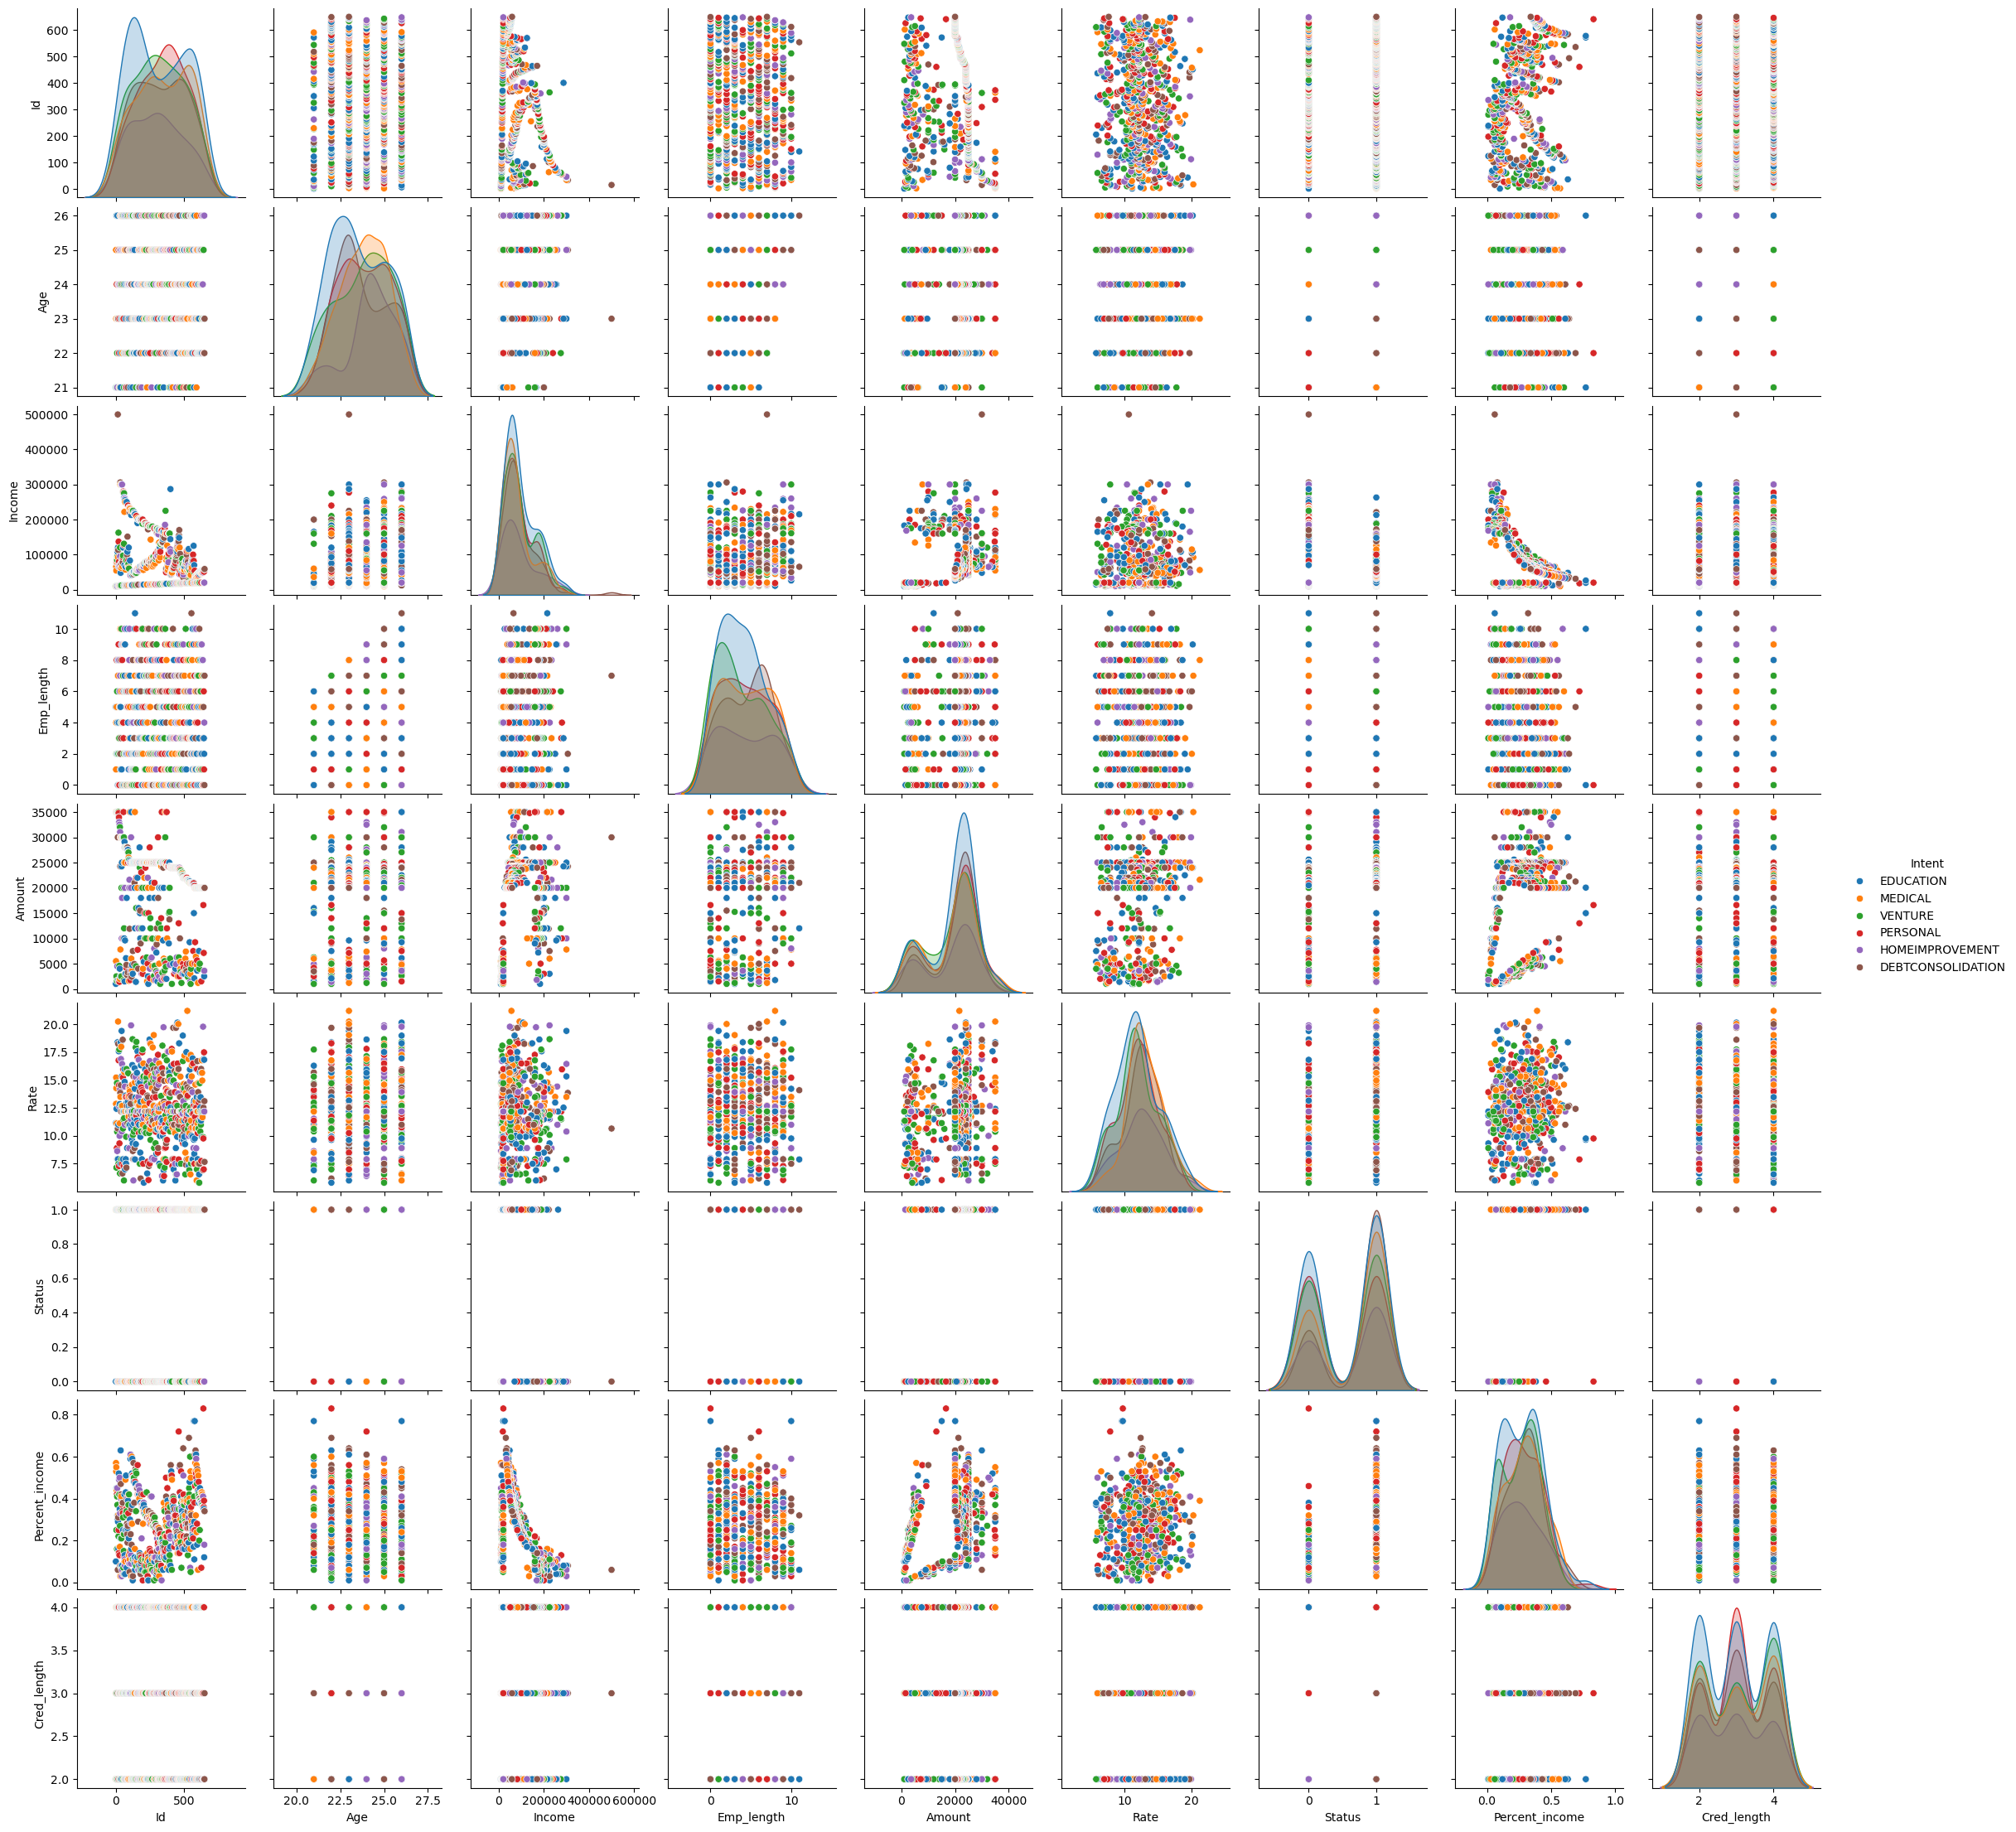

In [474]:
sns.pairplot(df, hue='Intent')
plt.show()

По полученной матрице диаграмм рассеивания можно пронаблюдать зависимость признаков, в зависимости от цели.

Pairplot по непрерывным значениям:

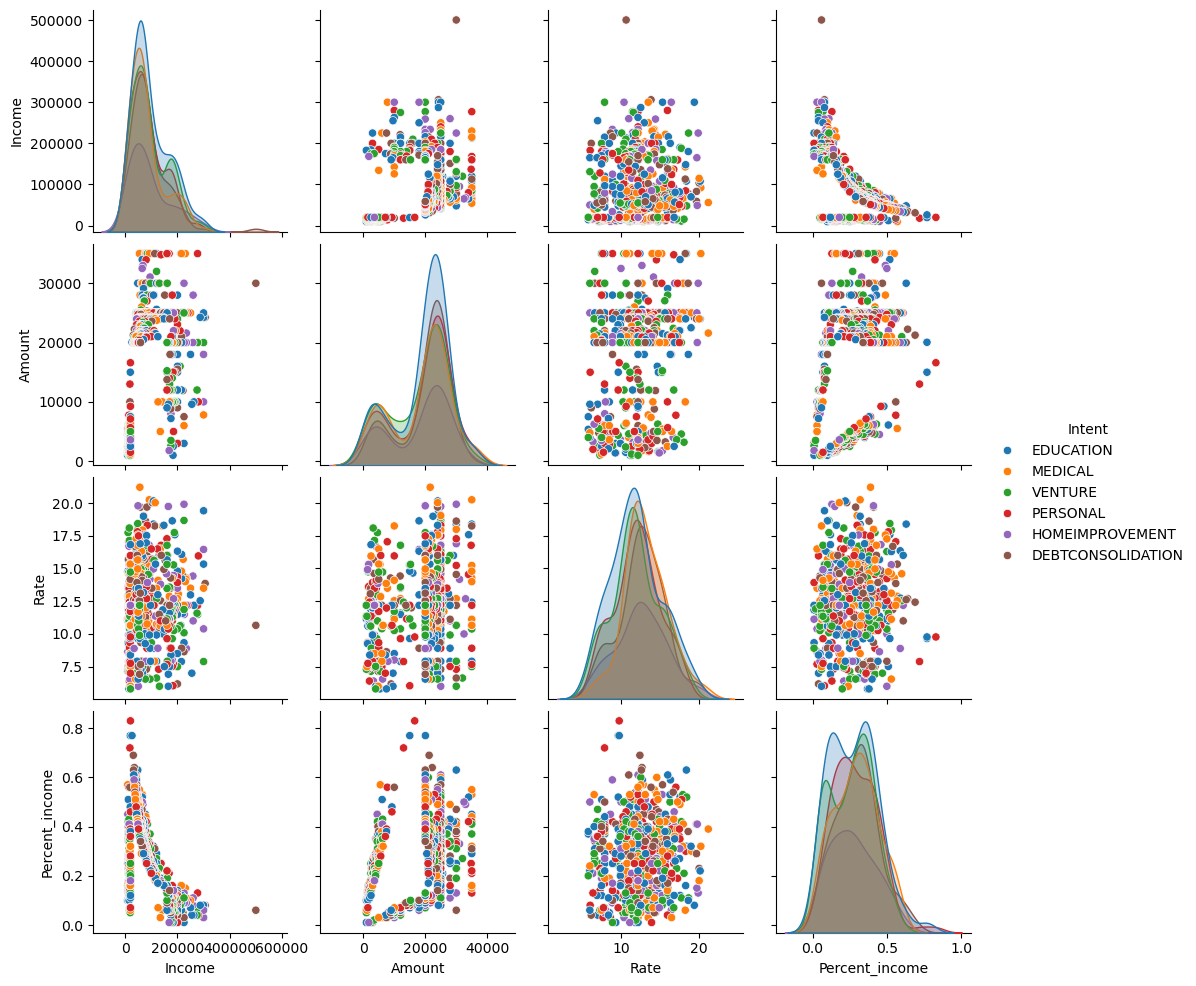

<Figure size 1000x1000 with 0 Axes>

In [477]:
clean_data = df.drop(columns = ['Id','Age', 'Emp_length', 'Status', 'Cred_length'])
sns.pairplot(clean_data, hue='Intent')
plt.figure(figsize=(10,10))
plt.show()

4. Убрать из матрицы корреляций id

Исправлено в основной части.

5. Первый график через plotly 

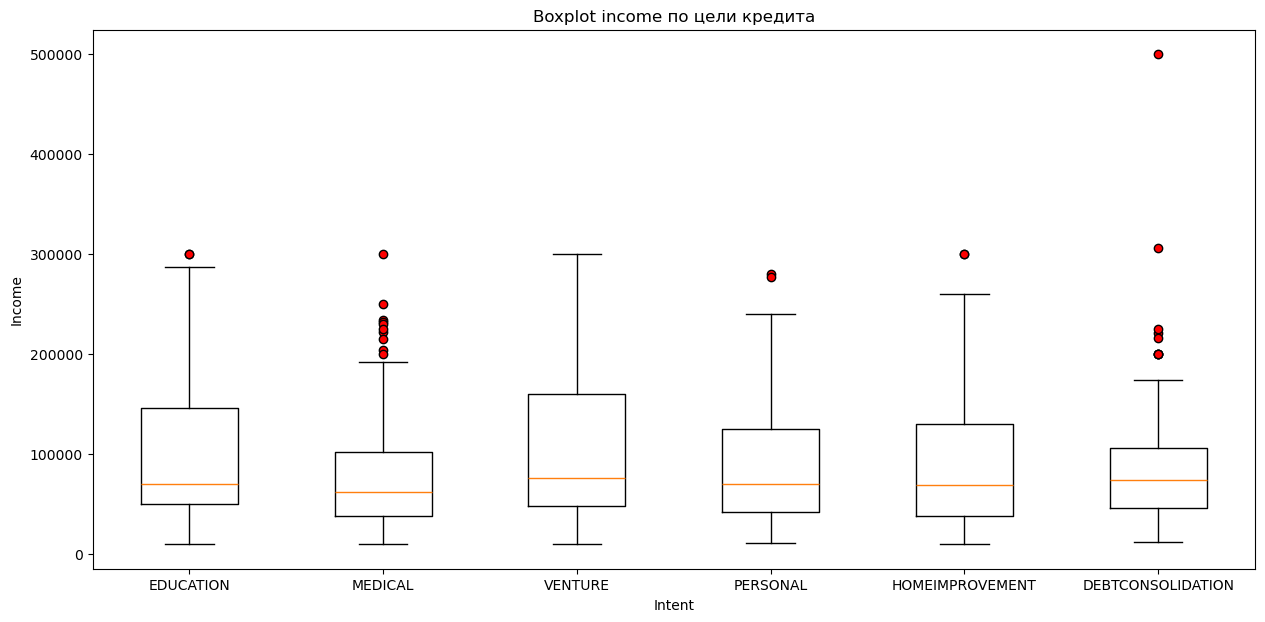

In [481]:
f, ax = plt.subplots(figsize=(15,7))
values = []
labels = []
for intent in df.Intent.unique():
    values.append(df[df['Intent'] == intent]['Income'])
    labels.append(intent)
ax.boxplot(x= values, labels=labels, flierprops={"markerfacecolor": "r", 'markersize': 6})
ax.set_title('Boxplot income по цели кредита')
ax.set_xlabel('Intent')
ax.set_ylabel('Income')
plt.show()

6. Сделать 3 график с помощью pandas

Вариант попроще:

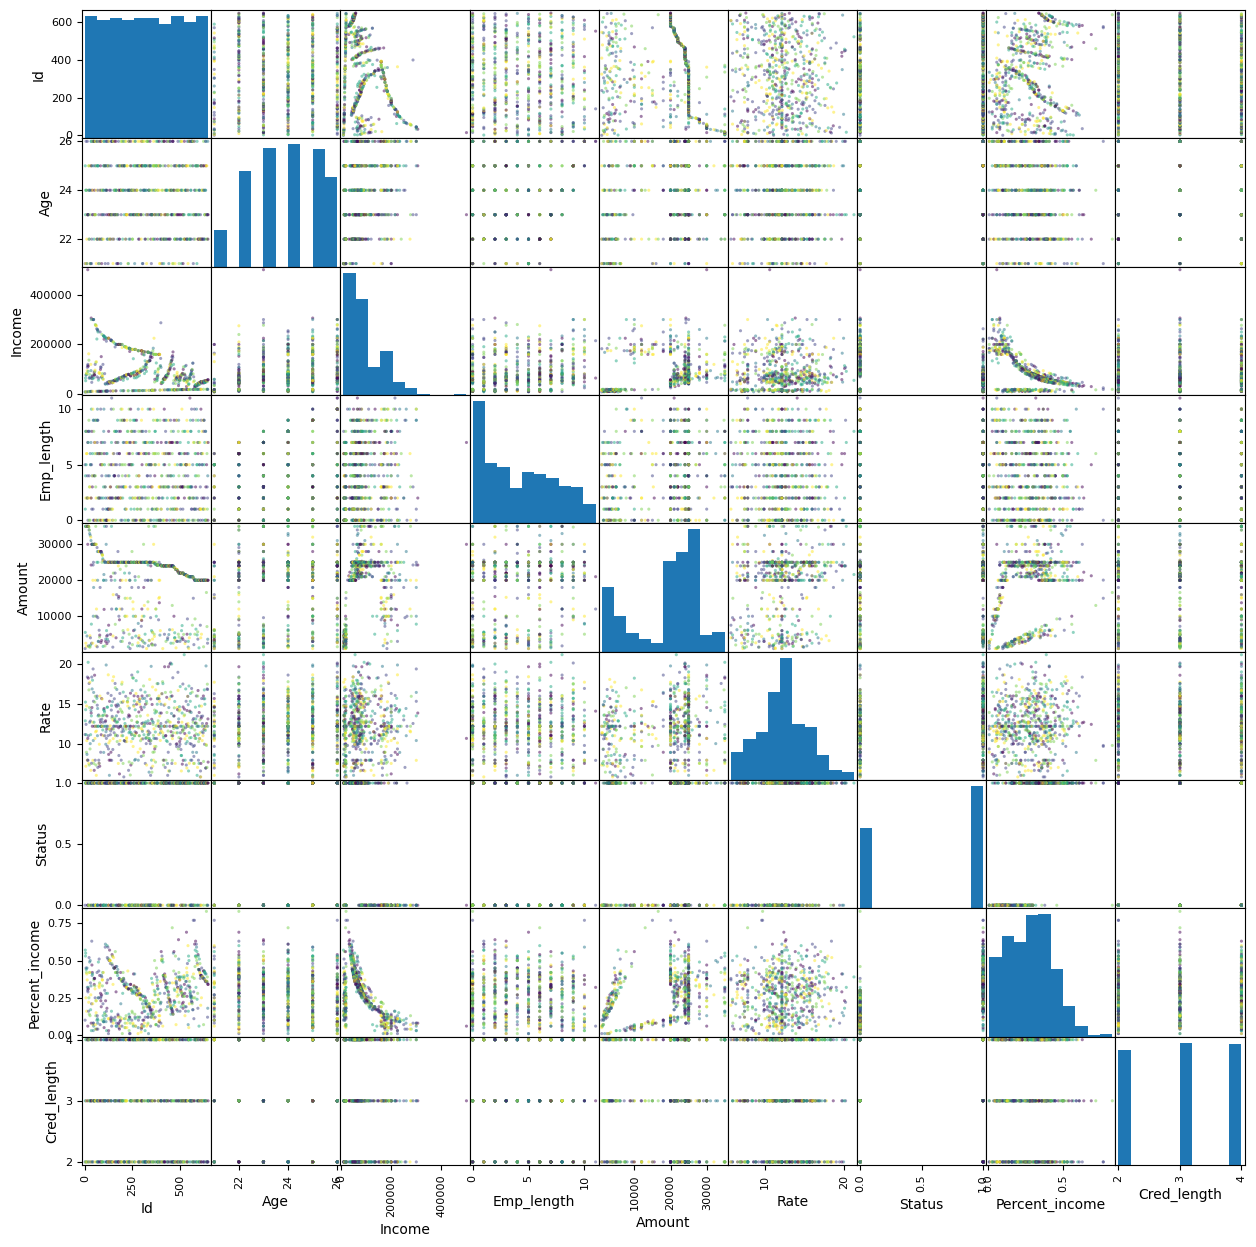

In [484]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
intents = le.fit_transform(df['Intent'])
pd.plotting.scatter_matrix(df, c=intents, figsize=(15, 15), s=20, alpha=0.5)
plt.show()

Вариант посложнее:

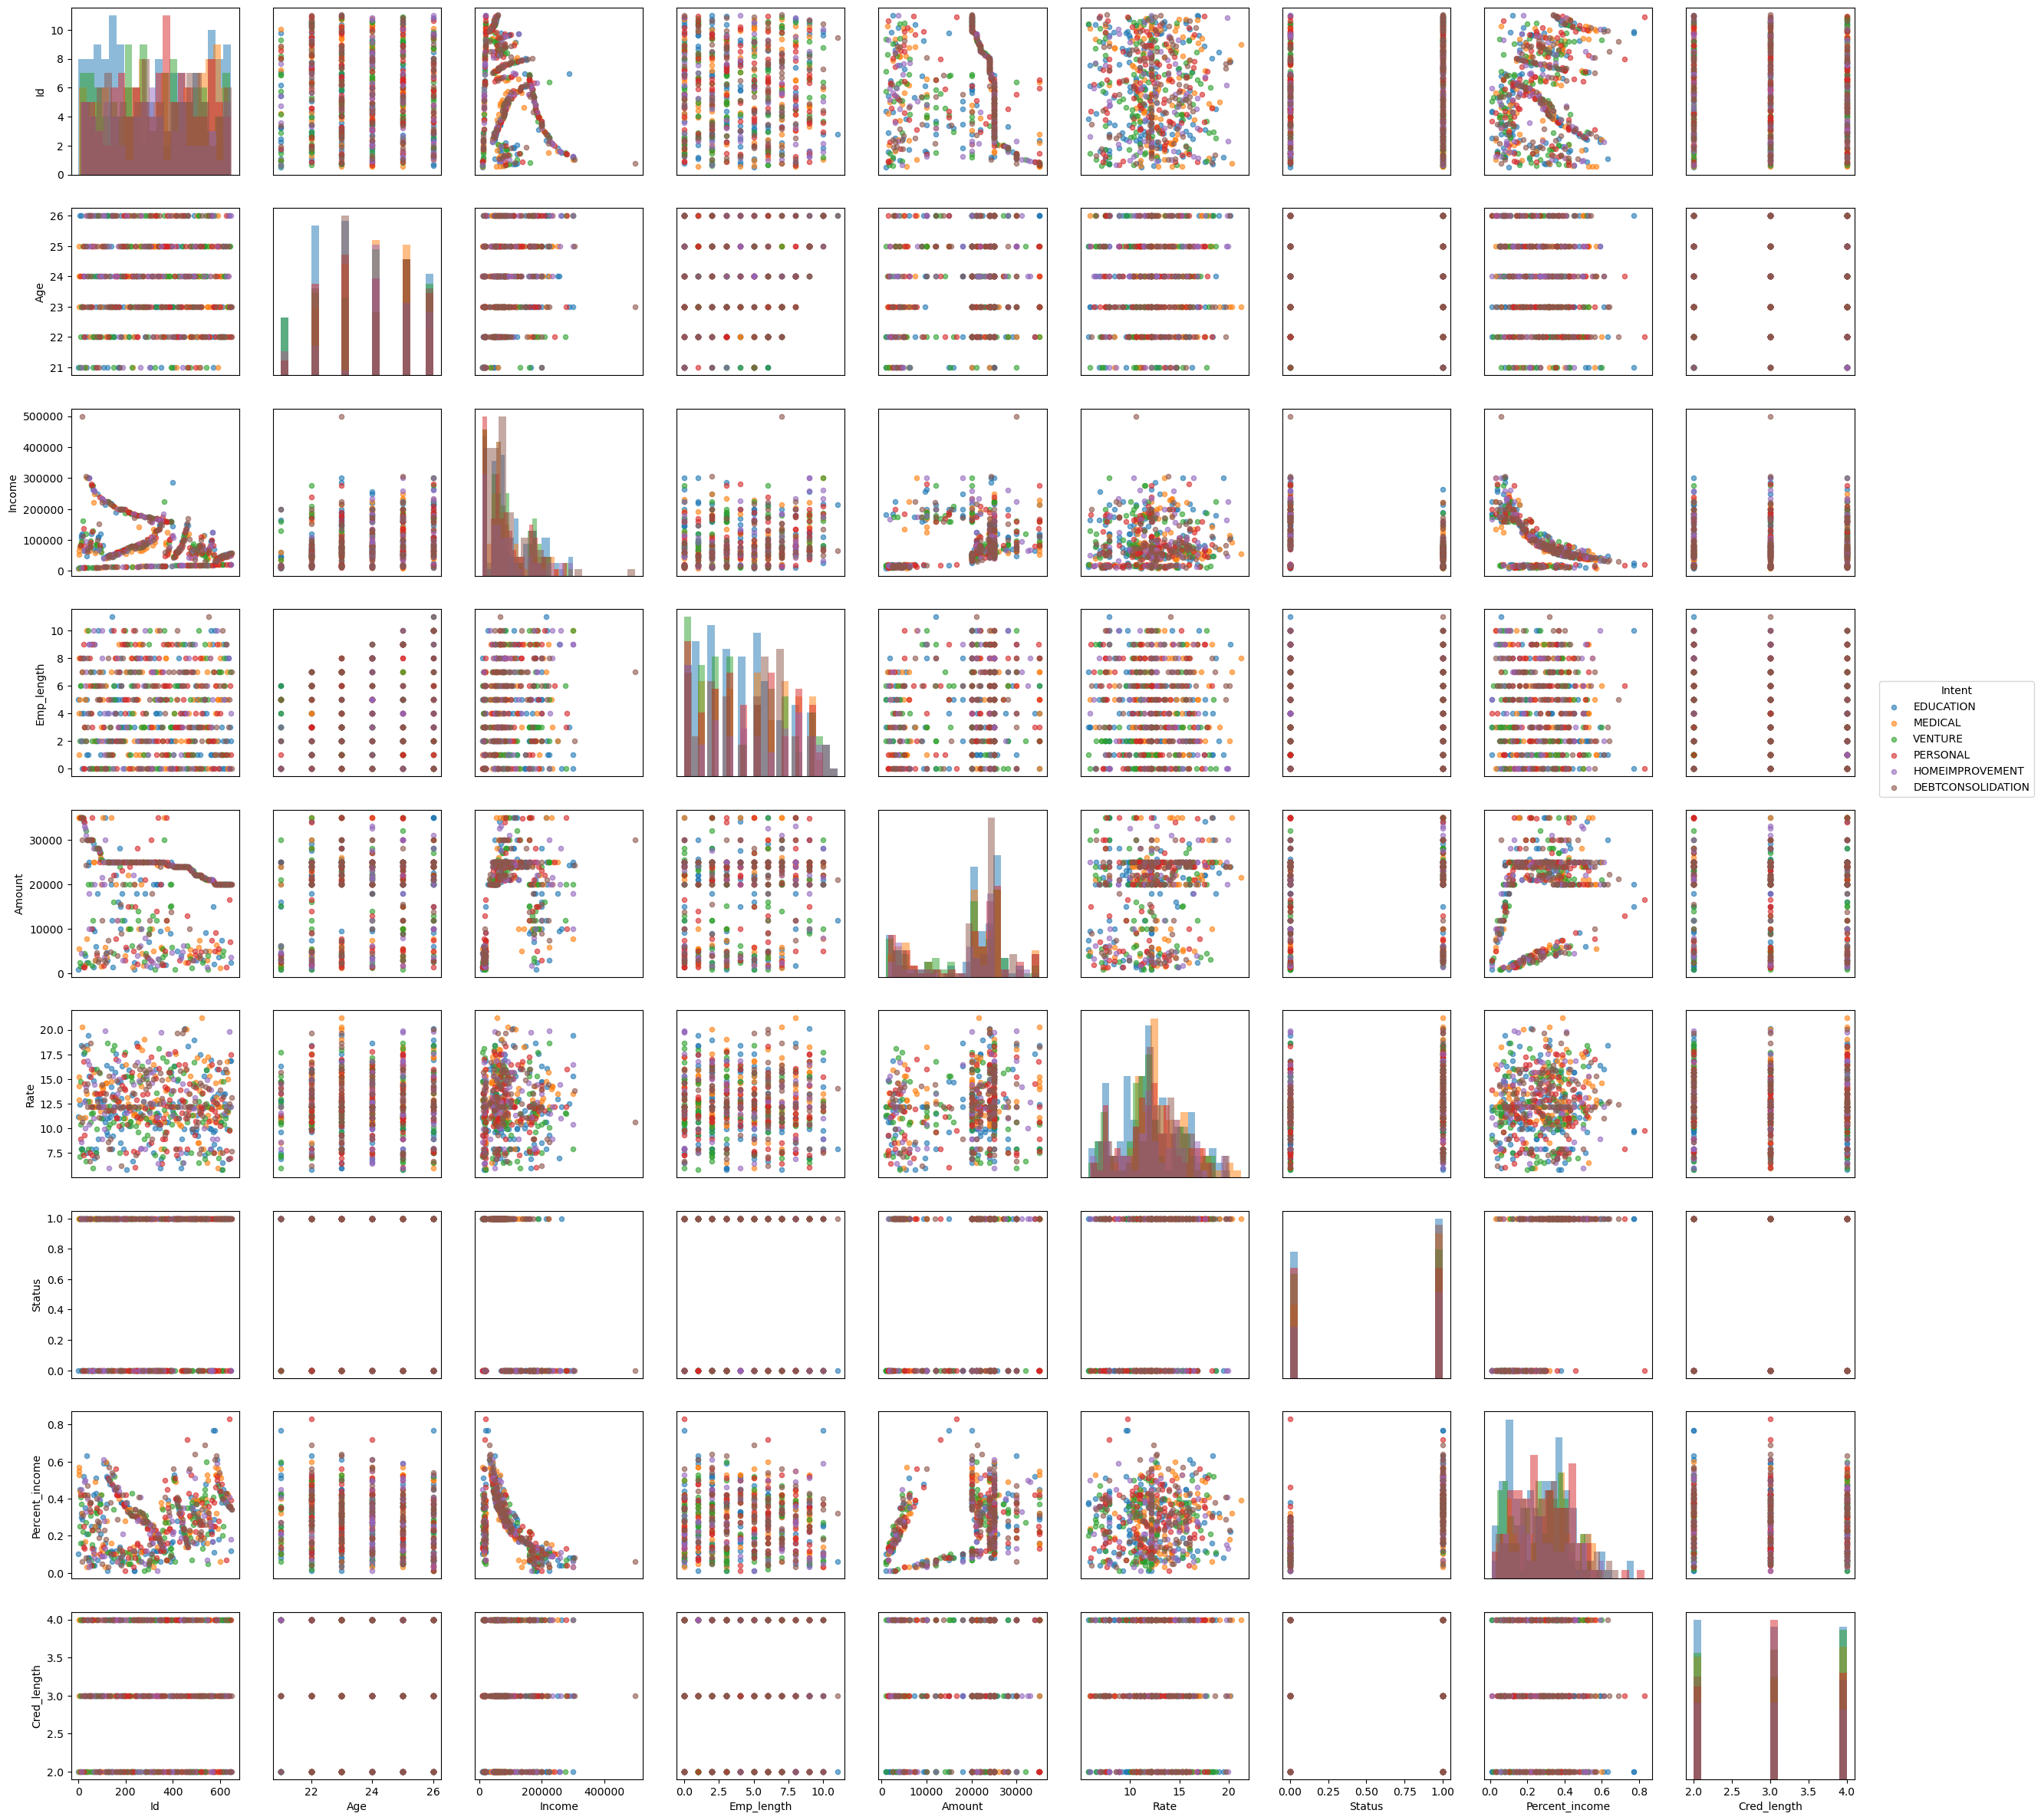

In [486]:
def pair(data, variables, hue):
    n = len(variables)
    fig, axes = plt.subplots(n, n, figsize=(30, 30))
    categories = data[hue].unique()
    for i in range(n):
        for j in range(n):
            ax = axes[i,j]
            
            if i != j:
                x = variables[j]
                y = variables[i]
                
                for cat in categories:
                    mask = data[hue] == cat
                    ax.scatter(data[mask][x], 
                             data[mask][y], 
                             label=cat if i == 0 and j == 1 else "",
                             alpha=0.6,
                             s=20)
                             
            else: 
                x = variables[i]
                for cat in categories:
                    mask = data[hue] == cat
                    ax.hist(data[mask][x],
                           bins=20,
                           alpha=0.5,
                           label=cat if i == 0 and j == 0 else "")
            
            if i == n-1: 
                ax.set_xlabel(variables[j])
            if j == 0:    
                ax.set_ylabel(variables[i])
                
            if j != 0:
                ax.set_yticks([])
            if i != n-1:
                ax.set_xticks([])
    
    axes[0,1].legend(title=hue, bbox_to_anchor=(10.5, -3))
    return fig
    
numeric_cols = df.select_dtypes(include='number').columns
fig = pair(df, numeric_cols, 'Intent')
plt.show()